# Customer Churn Prediction — Jupyter Notebook

This notebook walks through data loading, preprocessing, modeling, evaluation, and business insights for churn prediction.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
uploaded = files.upload()

file1_name = list(uploaded.keys())[0]


# Read the files into pandas DataFrames
df = pd.read_csv(io.BytesIO(uploaded[file1_name]))



print(f"Successfully loaded '{file1_name}' into df")
print("Here are the first few rows of df:")
display(df.head())


Saving Churn_Modelling.csv to Churn_Modelling.csv
Successfully loaded 'Churn_Modelling.csv' into df
Here are the first few rows of df:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [7]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

# Load dataset
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


## Quick EDA

In [ ]:
#desriptive statistics
df.info()
df.isna().sum()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


,count,mean,std,min,25%,50%,75%,max
RowNumber,10002.0,5.001500e+03,2887.472338,1.00,2501.25,5001.50,7.501750e+03,10000.00
CustomerId,10002.0,1.569093e+07,71931.769345,15565701.00,15628524.75,15690732.00,1.575323e+07,15815690.00
CreditScore,10002.0,6.505551e+02,96.661615,350.00,584.00,652.00,7.180000e+02,850.00
Age,10001.0,3.892231e+01,10.487200,18.00,32.00,37.00,4.400000e+01,92.00
Tenure,10002.0,5.012498e+00,2.891973,0.00,3.00,5.00,7.000000e+00,10.00
Balance,10002.0,7.649111e+04,62393.474144,0.00,0.00,97198.54,1.276478e+05,250898.09
NumOfProducts,10002.0,1.530194e+00,0.581639,1.00,1.00,1.00,2.000000e+00,4.00
HasCrCard,10001.0,7.055294e-01,0.455827,0.00,0.00,1.00,1.000000e+00,1.00
IsActiveMember,10001.0,5.149485e-01,0.499801,0.00,0.00,1.00,1.000000e+00,1.00
EstimatedSalary,10002.0,1.000833e+05,57508.117802,11.58,50983.75,100185.24,1.493837e+05,199992.48


In [8]:
df['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.796241
1,0.203759


Preprocessing
Spiting into train and test data( 80-20)

In [9]:
# Target variable: 'Exited' is churn flag
y = df['Exited']
X = df.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname'], errors='ignore')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Identify categorical and numeric features
numeric_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])

## Baseline Model: Logistic Regression

In [10]:
pipeline_logreg = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

pipeline_logreg.fit(X_train, y_train)

print(classification_report(y_test, pipeline_logreg.predict(X_test)))
print('ROC AUC:', roc_auc_score(y_test, pipeline_logreg.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1593
           1       0.38      0.70      0.50       408

    accuracy                           0.71      2001
   macro avg       0.64      0.71      0.65      2001
weighted avg       0.80      0.71      0.74      2001

ROC AUC: 0.7711972108366258


## Stronger Model: Random Forest

In [11]:
pipeline_rf = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

pipeline_rf.fit(X_train, y_train)
print(classification_report(y_test, pipeline_rf.predict(X_test)))
print('ROC AUC:', roc_auc_score(y_test, pipeline_rf.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.62      0.58      0.60       408

    accuracy                           0.84      2001
   macro avg       0.76      0.74      0.75      2001
weighted avg       0.84      0.84      0.84      2001

ROC AUC: 0.8499993845623625


## ROC Curve and PR Curve

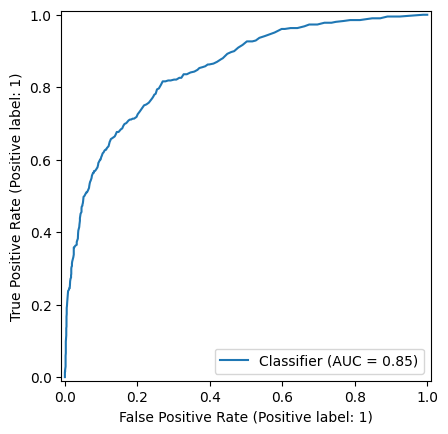

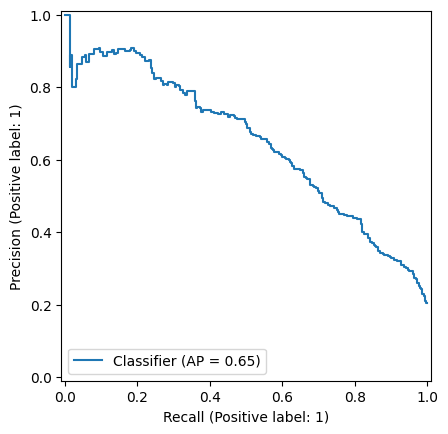

In [12]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

y_proba = pipeline_rf.predict_proba(X_test)[:,1]
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.show()

## Business-Oriented Profit Analysis

In [13]:
thresholds = np.linspace(0.0,1.0,101)
profits = []
for t in thresholds:
    preds = (y_proba >= t).astype(int)
    tp = ((preds==1) & (y_test==1)).sum()
    fp = ((preds==1) & (y_test==0)).sum()
    profit = tp*(1000-100) - fp*100  # Example values
    profits.append(profit)

best_t = thresholds[np.argmax(profits)]
print('Best threshold by profit:', best_t)
print('Max profit:', max(profits))

Best threshold by profit: 0.13
Max profit: 260200


In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline # Import ImbPipeline

# XGBoost pipeline
pipeline_xgb = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_estimators=200,
        max_depth=4,
        learning_rate=0.1
    ))
])

pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)
y_prob_xgb = pipeline_xgb.predict_proba(X_test)[:,1]

# Evaluation
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1": [],
    "ROC AUC": []
}

def evaluate_model(name, y_true, y_pred, y_prob):
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_true, y_pred))
    metrics["Precision"].append(precision_score(y_true, y_pred))
    metrics["Recall"].append(recall_score(y_true, y_pred))
    metrics["F1"].append(f1_score(y_true, y_pred))
    metrics["ROC AUC"].append(roc_auc_score(y_true, y_prob))

# Evaluate Logistic Regression
y_pred_lr = pipeline_logreg.predict(X_test)
y_prob_lr = pipeline_logreg.predict_proba(X_test)[:,1]
evaluate_model("Logistic Regression", y_test, y_pred_lr, y_prob_lr)

# Evaluate Random Forest
y_pred_rf = pipeline_rf.predict(X_test)
y_prob_rf = pipeline_rf.predict_proba(X_test)[:,1]
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)

# Evaluate XGBoost
evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb)

# Results table
results_df = pd.DataFrame(metrics)
results_df

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:29:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Logistic Regression,0.710145,0.384409,0.700980,0.496528,0.771197
1,Random Forest,0.842579,0.622691,0.578431,0.599746,0.849999
2,XGBoost,0.854073,0.648718,0.620098,0.634085,0.864473
